- [Synopsis](#Synopsis)
- [Imports](#Imports)
- [Overview](#Overview)
- [Series, DataFrame, Panel](#Series,-DataFrame,-Panel)
- [Selecting, Filtering, Sorting](#Selecting,-Filtering,-Sorting)
- [Preprocessing, Computations](#Preprocessing,-Computations)
- [Grouping](#Grouping)
- [Concatenating, Merging](#Concatenating,-Merging)
- [Reshaping](#Reshaping)
- [Text](#Text)
- [Categoricals](#Categoricals)
- [Timeseries](#Timeseries)
- [Visualization](#Visualization)
- [Reading and Saving](#Reading-and-Saving)

### Synopsis

### Imports

In [1]:
from datetime import date, datetime, timedelta
from numpy.random import rand, randn
from pandas import date_range, period_range
from pandas import Series, DataFrame, Panel

### Overview

Data preparation and feature engineering is estimated to take 80 to 90 percent of the time required to develop a machine learning model. Thus, Pandas. It proves particularly useful for the early stages of data inspection and preprocessing. The Pandas package makes it possible to read data into a
specialized data structure called a data frame.

### Series, DataFrame, Panel

Series object represents 1-dim labeled array which extends the numpy ndarray to provide operations such as indexed data retrival, automatic aliignment. A Series can hold data values of a single type.

DataFrame extends the capabilities of Series to use columnar/tabular data which can be of more than one data type. Each column of DataFrame is a Series, and each row of a DataFrame can be accessed through an index labels. Similarily to Series, DataFrame also has the automatic alignment of data by index labels.

Panel extend DataFrame by additing extra axis called 'items'.

In [2]:
s = pd.Series([6,3,np.nan,5,3])
s[1:3] # indexing as in ndarray

1    3.0
2    NaN
dtype: float64

In [3]:
s = pd.Series([6,3,np.nan,5,3], index=['a','b','c','d','e']) # index assigned at the construction time
s[['b','c']] # indexing by labels

b    3.0
c    NaN
dtype: float64

In [4]:
s = pd.Series([6,3,np.nan,5,3])
s.index = list('ABCDE') # index assigned after the construction time 
s[1:3] # indexing as in ndarray

B    3.0
C    NaN
dtype: float64

In [5]:
s.index

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

In [6]:
s.values

array([ 6.,  3., nan,  5.,  3.])

In [7]:
s.count(), s.nunique() # count of non NaN, and unique values

(4, 3)

In [8]:
s.unique()

array([ 6.,  3., nan,  5.])

In [9]:
s.value_counts(dropna=False) # the count of unique() values

 3.0    2
 5.0    1
NaN     1
 6.0    1
dtype: int64

In [10]:
s2 = pd.Series(np.arange(3), index=['D','C','B']) 
s - s2 # add the two series observing Series alignment

A    NaN
B    1.0
C    NaN
D    5.0
E    NaN
dtype: float64

In [11]:
pd.DataFrame(np.array([ ['a',1], ['b',2] ])) # DataFrame with default index and columns names

,0,1
0,a,1
1,b,2


In [12]:
pd.DataFrame.from_records([ ['a',1], ['b',2] ])

,0,1
0,a,1
1,b,2


In [13]:
pd.DataFrame.from_dict( {'a':[1,3], 'b':[2,4]} )

,a,b
0,1,2
1,3,4


In [14]:
df = pd.DataFrame(np.array([[1,2], [3,4]]), columns=['C1', 'C2'], index=['R1', 'R2'])
df

,C1,C2
R1,1,2
R2,3,4


In [15]:
df.index

Index(['R1', 'R2'], dtype='object')

In [16]:
df.columns

Index(['C1', 'C2'], dtype='object')

In [17]:
df.values

array([[1, 2],
       [3, 4]])

In [18]:
df = pd.DataFrame({   
        'A' : 3.,
        'B' : pd.Timestamp( datetime.now() ),
        'C' : pd.Series( 5, index=list(range(4)), dtype='float' ),
        'D' : np.arange( 100, 104 ),
        'E' : pd.Categorical( ["cat-1","cat-2","cat-3","cat-1"] ),
        'F' : 'Alpha'
    })
df

,A,B,C,D,E,F
0,3.0,2019-02-19 22:42:25.565540,5.0,100,cat-1,Alpha
1,3.0,2019-02-19 22:42:25.565540,5.0,101,cat-2,Alpha
2,3.0,2019-02-19 22:42:25.565540,5.0,102,cat-3,Alpha
3,3.0,2019-02-19 22:42:25.565540,5.0,103,cat-1,Alpha


In [19]:
df.shape

(4, 6)

In [20]:
df['B'] # [] works along the 'columns' axis, and not the 'rows' axis as in Series

0   2019-02-19 22:42:25.565540
1   2019-02-19 22:42:25.565540
2   2019-02-19 22:42:25.565540
3   2019-02-19 22:42:25.565540
Name: B, dtype: datetime64[ns]

In [21]:
df.loc[0,['B','E']] # select data in the 0 row and in the 'B' and 'E' columns

B    2019-02-19 22:42:25.565540
E                         cat-1
Name: 0, dtype: object

In [22]:
df['New Col'] = pd.Series(['X','Y'], index=[1,3]) # automatically aligns
df

,A,B,C,D,E,F,New Col
0,3.0,2019-02-19 22:42:25.565540,5.0,100,cat-1,Alpha,NaN
1,3.0,2019-02-19 22:42:25.565540,5.0,101,cat-2,Alpha,X
2,3.0,2019-02-19 22:42:25.565540,5.0,102,cat-3,Alpha,NaN
3,3.0,2019-02-19 22:42:25.565540,5.0,103,cat-1,Alpha,Y


In [23]:
dates = pd.date_range( date.today(),periods=5 )
df = pd.DataFrame( np.random.randn(5,4), index=dates, columns=list('ABCD') )
df.index

DatetimeIndex(['2019-02-19', '2019-02-20', '2019-02-21', '2019-02-22',
               '2019-02-23'],
              dtype='datetime64[ns]', freq='D')

### Selecting, Filtering, Sorting

In [24]:
today = date.today()
df = DataFrame(np.random.randn(5,4), columns=list('ABCD'), index=date_range(today,periods=5))
df

,A,B,C,D
2019-02-19,1.265285,-0.209124,0.141881,-0.481468
2019-02-20,0.742845,0.959886,-0.301624,0.161483
2019-02-21,0.792584,0.225610,0.003309,-0.531213
2019-02-22,0.594559,2.209495,-1.851865,1.518418
2019-02-23,0.496043,1.011419,-1.596191,0.828033


In [25]:
tomorrow = today + timedelta(days=1)
df[today:tomorrow]

,A,B,C,D
2019-02-19,1.265285,-0.209124,0.141881,-0.481468
2019-02-20,0.742845,0.959886,-0.301624,0.161483


In [26]:
df.loc[today:tomorrow,['D','A']] #for getting access thru location labels

,D,A
2019-02-19,-0.481468,1.265285
2019-02-20,0.161483,0.742845


In [27]:
df.iloc[0:2,[3,1]] #for getting access thru integer position location indexes

,D,B
2019-02-19,-0.481468,-0.209124
2019-02-20,0.161483,0.959886


In [28]:
df.tail(3) # last 3 rows

,A,B,C,D
2019-02-21,0.792584,0.225610,0.003309,-0.531213
2019-02-22,0.594559,2.209495,-1.851865,1.518418
2019-02-23,0.496043,1.011419,-1.596191,0.828033


In [29]:
df[df.A>0] # selects rows where df.A > 0

,A,B,C,D
2019-02-19,1.265285,-0.209124,0.141881,-0.481468
2019-02-20,0.742845,0.959886,-0.301624,0.161483
2019-02-21,0.792584,0.225610,0.003309,-0.531213
2019-02-22,0.594559,2.209495,-1.851865,1.518418
2019-02-23,0.496043,1.011419,-1.596191,0.828033


In [30]:
df[df>0] # selects rows where the cell value > 0

,A,B,C,D
2019-02-19,1.265285,NaN,0.141881,NaN
2019-02-20,0.742845,0.959886,NaN,0.161483
2019-02-21,0.792584,0.225610,0.003309,NaN
2019-02-22,0.594559,2.209495,NaN,1.518418
2019-02-23,0.496043,1.011419,NaN,0.828033


In [31]:
df2 = df.copy()
df2['E']=['one', 'two','three','one','two']
df2

,A,B,C,D,E
2019-02-19,1.265285,-0.209124,0.141881,-0.481468,one
2019-02-20,0.742845,0.959886,-0.301624,0.161483,two
2019-02-21,0.792584,0.225610,0.003309,-0.531213,three
2019-02-22,0.594559,2.209495,-1.851865,1.518418,one
2019-02-23,0.496043,1.011419,-1.596191,0.828033,two


In [32]:
df2[ df2.E.str.startswith('t') ]

,A,B,C,D,E
2019-02-20,0.742845,0.959886,-0.301624,0.161483,two
2019-02-21,0.792584,0.225610,0.003309,-0.531213,three
2019-02-23,0.496043,1.011419,-1.596191,0.828033,two


In [33]:
df2[ df2['E'].isin( ['two','three'] ) ]

,A,B,C,D,E
2019-02-20,0.742845,0.959886,-0.301624,0.161483,two
2019-02-21,0.792584,0.225610,0.003309,-0.531213,three
2019-02-23,0.496043,1.011419,-1.596191,0.828033,two


In [34]:
df2.reindex( index=df2.index[::2], columns=df2.columns[::-1] )

,E,D,C,B,A
2019-02-19,one,-0.481468,0.141881,-0.209124,1.265285
2019-02-21,three,-0.531213,0.003309,0.225610,0.792584
2019-02-23,two,0.828033,-1.596191,1.011419,0.496043


In [35]:
df2 = df[:3].copy()
df2.iloc[0,1] = np.nan
df2.iloc[1,[1,2]] = np.nan
df2

,A,B,C,D
2019-02-19,1.265285,NaN,0.141881,-0.481468
2019-02-20,0.742845,NaN,NaN,0.161483
2019-02-21,0.792584,0.22561,0.003309,-0.531213


In [36]:
df2 = df2.dropna(thresh=3)
df2

,A,B,C,D
2019-02-19,1.265285,NaN,0.141881,-0.481468
2019-02-21,0.792584,0.22561,0.003309,-0.531213


In [37]:
df2.fillna(value=df2.mean())

,A,B,C,D
2019-02-19,1.265285,0.22561,0.141881,-0.481468
2019-02-21,0.792584,0.22561,0.003309,-0.531213


Note that ix() has to guess what are you referring to. Therefore, if
you don't want to mix labels and positional indexes, loc and iloc
are preferred to create a more structured approach. With .iloc(), you must specify the cell by using the row number and column number; .loc()operates on labels.

In [38]:
df.sort_values(by=['D','C'], ascending=[True,False])

,A,B,C,D
2019-02-21,0.792584,0.225610,0.003309,-0.531213
2019-02-19,1.265285,-0.209124,0.141881,-0.481468
2019-02-20,0.742845,0.959886,-0.301624,0.161483
2019-02-23,0.496043,1.011419,-1.596191,0.828033
2019-02-22,0.594559,2.209495,-1.851865,1.518418


In [39]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2019-02-19,-0.481468,0.141881,-0.209124,1.265285
2019-02-20,0.161483,-0.301624,0.959886,0.742845
2019-02-21,-0.531213,0.003309,0.225610,0.792584
2019-02-22,1.518418,-1.851865,2.209495,0.594559
2019-02-23,0.828033,-1.596191,1.011419,0.496043


In [40]:
df = pd.DataFrame({'CT':np.random.choice(['A','B'],10),
                   'TP':np.random.choice(['X','Y','Z'],10),
                   'Val':np.random.randint(0,100,10)})
df.sort_values(by=['CT','Val'], ascending=[True,False])

,CT,TP,Val
3,A,Z,97
2,A,Z,50
5,A,X,10
6,A,X,10
1,B,X,84
4,B,Y,70
9,B,Z,66
8,B,X,43
7,B,Z,30
0,B,Y,2


### Preprocessing, Computations

In [41]:
s = Series(np.random.randint(0,100,100))
s[:3]

0    71
1    85
2     7
dtype: int64

In [42]:
2 * s[:3] - s[0] # multiplies each value by 2, then subtracts s[0]

0    71
1    99
2   -57
dtype: int64

In [43]:
s[::10] = np.nan # set 10 NaN values
s.sum(), s.mean(), s.std()

(4708.0, 52.31111111111111, 31.27106730568936)

In [44]:
s.max(), s.idxmax(), s[s.idxmax()]

(99.0, 28, 99.0)

In [45]:
s.size , s.count(), s.nunique() 
# returns total size, non null value count, and num of unique values

(100, 90, 61)

In [46]:
s.cumsum()[-3:]

97    4660.0
98    4708.0
99    4708.0
dtype: float64

In [47]:
df = DataFrame(np.random.randn(3,3), columns=['A','B','C'])
df - df.iloc[0] 
# df.iloc[0] is broadcast along 'rows' axis, 
# thus the values from the first row are subtracted 

,A,B,C
0,0.000000,0.000000,0.000000
1,-1.391748,1.158656,0.026306
2,-1.020731,2.364480,-1.494635


In [48]:
z = df.sub(df.mean(), axis=1).div(df.std(), axis=1) 
# standardizes, i.e. subtracts the mean() and divides by std()
z

,A,B,C
0,1.115793,-0.993285,0.562177
1,-0.815295,-0.013298,0.592392
2,-0.300499,1.006583,-1.154569


In [49]:
dates = pd.date_range( date.today(), periods=5 )
df = pd.DataFrame( np.random.randn(5,4), index=dates, columns=list('ABCD') )
df

,A,B,C,D
2019-02-19,-0.923318,0.022668,1.280338,2.045394
2019-02-20,1.731839,-0.022876,-0.157084,0.292427
2019-02-21,-1.305736,-0.701985,1.045875,-2.479238
2019-02-22,-0.792070,-0.127485,0.991438,0.439211
2019-02-23,-0.084263,-1.841392,-0.511378,-0.367437


In [50]:
df.mean() # default axis=0, i.e. column-wise means

A   -0.274710
B   -0.534214
C    0.529838
D   -0.013929
dtype: float64

In [51]:
df.mean(1) # axis=1, i.e. row-wise means

2019-02-19    0.606271
2019-02-20    0.461077
2019-02-21   -0.860271
2019-02-22    0.127774
2019-02-23   -0.701117
Freq: D, dtype: float64

In [52]:
df = DataFrame(np.random.randn(100, 3), columns=['a', 'b', 'c'])
s = df.a + 0.1 * np.random.randn(100) # sets strong correlation with 'a'
df.corrwith(s)

a    0.993394
b    0.076086
c    0.030150
dtype: float64

.apply() operates on a one-dimensional array, giving a single number for result.

In [53]:
df.apply(lambda c: c.max() - c.min()) # column-wise ranges, axis=0 is the default

a    4.802994
b    5.053551
c    4.718244
dtype: float64

In [54]:
df.apply(lambda r: r.max() - r.min(), axis=1)[:3] # row-wise ranges

0    0.324797
1    2.680425
2    2.069189
dtype: float64

In [55]:
df.apply(np.cumsum, axis=1)[:3] # row-wise cumsums

,a,b,c
0,0.511606,0.796728,1.406647
1,1.469337,0.604641,-0.606446
2,-1.532279,-0.995368,-1.386647


In [56]:
df = DataFrame(np.e**np.random.randint(1,10,(10,2)),columns=['A','B'])
df['C'] = np.random.choice(['X','Y'],10)
df.tail()

,A,B,C
5,2.718282,1096.633158,X
6,8103.083928,20.085537,X
7,7.389056,2980.957987,X
8,20.085537,1096.633158,X
9,54.598150,2.718282,X


In [57]:
df[['A','B']] = df[['A','B']].apply(np.log) # returns the log of e^exponent
df['D'] = df.C.apply(lambda v: 'Cat. '+v) 
# prepends 'Cat.'; apply works here on the Series df.C
df.tail()

,A,B,C,D
5,1.0,7.0,X,Cat. X
6,9.0,3.0,X,Cat. X
7,2.0,8.0,X,Cat. X
8,3.0,7.0,X,Cat. X
9,4.0,1.0,X,Cat. X


In [58]:
x = pd.Series({"one": 1, "two": 2, "three": 3})
y = pd.Series({1: "Uno", 2: "Due"})
x.map(y)

one      Uno
two      Due
three    NaN
dtype: object

In [59]:
df = pd.DataFrame({'a': [0, 1, 2, 3, 4], 'b': [5, 6, 7, 8, 9]})
df.replace({'a': 1, 'b': 8}, {'a': 300, 'b': 900})

,a,b
0,0,5
1,300,6
2,2,7
3,3,900
4,4,9


In [60]:
df = pd.DataFrame(np.arange(12).reshape(4, 3), columns=['a', 'b', 'c'])
df.apply(lambda col: col.sum())

a    18
b    22
c    26
dtype: int64

In [61]:
df.apply(lambda row: row.sum(), axis=1)

0     3
1    12
2    21
3    30
dtype: int64

### Grouping

In [62]:
df = pd.DataFrame({
    'Date' : pd.date_range('2016-01',periods=5,freq='M'),
    'Cat' : np.random.choice(['x','y','z'],5),
    'Prod' : np.random.choice(['alpha','beta'],5),
    'Values' : np.random.randint(0,100,5)
})
df

,Date,Cat,Prod,Values
0,2016-01-31,y,beta,40
1,2016-02-29,y,alpha,85
2,2016-03-31,x,alpha,11
3,2016-04-30,z,alpha,53
4,2016-05-31,y,alpha,95


In [63]:
df.groupby(['Cat','Prod']).sum()

Values
Cat Prod         
x   alpha      11
y   alpha     180
    beta       40
z   alpha      53

In [64]:
df.groupby([pd.Grouper(key='Date', freq='Q'),'Prod']).sum()

Values
Date       Prod         
2016-03-31 alpha      96
           beta       40
2016-06-30 alpha     148

In [65]:
df.groupby('Cat').agg([np.sum, 'mean', np.std])

Values                      
       sum       mean        std
Cat                             
x       11  11.000000        NaN
y      220  73.333333  29.297326
z       53  53.000000        NaN

In [66]:
df = pd.DataFrame({'CT':np.random.choice(['A','B'],10),
                   'TP':np.random.choice(['X','Y','Z'],10),
                   'Val':np.random.randint(0,100,10)})

func = lambda items: items.groupby('TP').agg({'Val':'sum'}).sort_values(by='Val')#, ascending=False)

df.groupby('CT').apply(func)

Val
CT TP     
A  Z    43
   Y    77
   X    81
B  X    70
   Y   145
   Z   158

In [67]:
df2 = df.set_index(['CT','TP'])
df2.sum(level=['CT','TP'])

Val
CT TP     
A  X    81
B  Y   145
   Z   158
A  Z    43
B  X    70
A  Y    77

In [68]:
s = pd.Series(np.random.randint(0,100,10))
factor = pd.cut(s, [0, 25, 50, 75, 100])
s.groupby(factor).size()

(0, 25]      1
(25, 50]     3
(50, 75]     3
(75, 100]    3
dtype: int64

In [69]:
index = pd.date_range('2015-01-01', periods=100)
ts = pd.Series(np.random.normal(0.5, 2, 100), index)

key = lambda x: x.month
nan2mean = lambda x: x.fillna(np.mean(x)) # replaces np.nan with monthly means

transformed = ts.groupby(key).transform(nan2mean)
transformed[:3]

2015-01-01   -0.611707
2015-01-02    1.282598
2015-01-03    1.506771
Freq: D, dtype: float64

In [70]:
df = pd.DataFrame({'G': [0,0,0,1,1,2,2], 'V': [1,2,3,5,4,2,5]})
df.groupby('G')['V'].transform(np.sum)

0    6
1    6
2    6
3    9
4    9
5    7
6    7
Name: V, dtype: int64

In [71]:
df.groupby('G')['V'].apply(np.sum)

G
0    6
1    9
2    7
Name: V, dtype: int64

### Concatenating, Merging

In [72]:
s = pd.Series(np.arange(5))
s2 = pd.Series(np.arange(5), index=list('12345')) # index is of type 'str'
s2.index = s2.index.astype(int) 
# type casting is required to match the two Series by the common index

In [73]:
pd.concat([s,s2], axis=1)

,0,1
0,0.0,NaN
1,1.0,0.0
2,2.0,1.0
3,3.0,2.0
4,4.0,3.0
5,NaN,4.0


In [74]:
s3 = s + s2
s3

0    NaN
1    1.0
2    3.0
3    5.0
4    7.0
5    NaN
dtype: float64

In [75]:
s.add(s2, fill_value=-9) # set fill_value where value for index is missing

0   -9.0
1    1.0
2    3.0
3    5.0
4    7.0
5   -5.0
dtype: float64

In [76]:
s3.fillna(method='ffill')

0    NaN
1    1.0
2    3.0
3    5.0
4    7.0
5    7.0
dtype: float64

In [77]:
df1 = pd.DataFrame( [[1,2,3],[4,5,6]] , columns=['A','B','C'] )
df2 = pd.DataFrame( [['a','b','c']], columns=['C','B','A'])
df1.append(df2, ignore_index=True, sort=False)

,A,B,C
0,1,2,3
1,4,5,6
2,c,b,a


In [78]:
pd.concat([df1,df2], keys=['df1','df2'], sort=False)

A  B  C
df1 0  1  2  3
    1  4  5  6
df2 0  c  b  a

In [79]:
pd.concat([df1,df2], axis=1, keys=['df1','df2'])

df1        df2          
    A  B  C    C    B    A
0   1  2  3    a    b    c
1   4  5  6  NaN  NaN  NaN

In [80]:
df1

,A,B,C
0,1,2,3
1,4,5,6


In [81]:
l = pd.DataFrame({'key': ['k1', 'k1', 'k2'], 'lval': [1, 2, 3]})
r = pd.DataFrame({'key': ['k1', 'k2', 'k3'], 'rval': [4, 5, 6]})
l

,key,lval
0,k1,1
1,k1,2
2,k2,3


In [82]:
r

,key,rval
0,k1,4
1,k2,5
2,k3,6


In [83]:
pd.merge(l,r,on='key',how='outer')

,key,lval,rval
0,k1,1.0,4
1,k1,2.0,4
2,k2,3.0,5
3,k3,NaN,6


In [84]:
df = pd.DataFrame([[1, np.nan, 3], [np.nan, 5, None]])
df2 = pd.DataFrame([[np.nan, 200, 300], [None, 500, 600]])
df.update(df2) # updates df with df2 where df2 is not NaN
df

,0,1,2
0,1.0,200.0,300.0
1,NaN,500.0,600.0


In [85]:
df = pd.DataFrame([[1, np.nan, 3], [np.nan, 5, None]])
df2 = pd.DataFrame([[np.nan, 200, 300], [None, 500, 600]])
df = df.combine_first(df2)  # takes values form df2 where df is missing
df 

,0,1,2
0,1.0,200.0,3.0
1,NaN,5.0,600.0


### Reshaping

In [86]:
import itertools
index = pd.MultiIndex.from_tuples(
            list(itertools.product( ('k','l'), ('m','n') )), 
            names=['C1', 'C2']
        )
index

MultiIndex(levels=[['k', 'l'], ['m', 'n']],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=['C1', 'C2'])

In [87]:
df = pd.DataFrame(np.random.randn(4, 2), index=index, columns=['A', 'B'])
df

A         B
C1 C2                    
k  m   0.216582  0.389023
   n   0.532605 -1.187471
l  m   0.947161  0.110445
   n  -0.893822  1.855273

In [88]:
unstacked = df.unstack(1)
unstacked

A                   B          
C2         m         n         m         n
C1                                        
k   0.216582  0.532605  0.389023 -1.187471
l   0.947161 -0.893822  0.110445  1.855273

In [89]:
unstacked.stack(0)

C2           m         n
C1                      
k  A  0.216582  0.532605
   B  0.389023 -1.187471
l  A  0.947161 -0.893822
   B  0.110445  1.855273

In [90]:
df = pd.DataFrame({
    'C1' : ['a', 'a', 'b', 'c'],
    'C2' : ['x', 'y'] * 2,
    'C3' : ['alpha', 'beta', 'gamma', 'beta'],
    'C4' : np.random.randint(0,100,4),
    'C5' : np.random.randint(0,100,4)
    })
df

,C1,C2,C3,C4,C5
0,a,x,alpha,78,2
1,a,y,beta,20,26
2,b,x,gamma,40,2
3,c,y,beta,62,25


In [91]:
df.pivot(index='C3', columns='C1', values='C5')

C1,a,b,c
C3,,,
alpha,2.0,NaN,NaN
beta,26.0,NaN,25.0
gamma,NaN,2.0,NaN


In [92]:
pd.pivot_table(df, 
               index=['C1'], columns=['C2','C3'],
               values='C4', aggfunc='sum',)  # pd.pivot_table(), as opposed to df.pivot()

C2     x           y
C3 alpha gamma  beta
C1                  
a   78.0   NaN  20.0
b    NaN  40.0   NaN
c    NaN   NaN  62.0

In [93]:
A = np.array(['one', 'one', 'two', 'one', 'two', 'one'])
B = pd.Series(np.array(['x', 'x', 'y', 'x', 'x', 'y']))
C = np.array(['foo', 'foo', 'bar', 'bar', 'foo', 'foo'])

pd.crosstab([A, B], C, rownames=['A','B'], colnames=['C'], margins=True)

C      bar  foo  All
A   B               
one x    1    2    3
    y    0    1    1
two x    0    1    1
    y    1    0    1
All      2    4    6

### Categoricals

In [94]:
from sklearn.datasets import load_iris
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series( pd.Categorical.from_codes(iris.target, categories=iris.target_names))

# or 

y = pd.Series( iris.target )
y = y.astype('category')
y.cat.categories = iris.target_names

In [95]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

df["grade"] = df["raw_grade"].astype("category")
df["grade"].cat.categories = ["very good", "good", "very bad"]

df["grade"] = df["grade"].cat.set_categories(
                                ["very bad", "bad", "medium", "good", "very good"]
                            )
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


### Timeseries

In [96]:
import datetime

Pandas uses 3 time-related types:
    - pd.Timestamp (datetimes), 
    - pd.Period (timespans or periods), 
    - pd.Timedelta (or timespans)

In [97]:
# Points in time are represented by Timestamps which is like python's datetime
pd.Timestamp('2016-01-01 12:00:00')

Timestamp('2016-01-01 12:00:00')

In [98]:
# Regular intervals of time are represented by Period
dec2015 = pd.Period('2015-12', freq='M') 
# 1 month period anchored at the start time of '2015-01'
dec2015

Period('2015-12', 'M')

In [99]:
feb2016 = dec2015 + 2 # adds 2 month periods
feb2016.start_time, feb2016.end_time

(Timestamp('2016-02-01 00:00:00'), Timestamp('2016-02-29 23:59:59.999999999'))

In [100]:
# time spans are represented by Timedelta
pd.Timedelta('1 day 2h 3min 5s')

Timedelta('1 days 02:03:05')

In [101]:
pd.to_datetime(['2016.01.01 12:00:00',20160101,'2016.04.04','2016.11.11', 'nan'], 
               errors='coerce') # format='%Y.%m.%d %H:%M:%S')

DatetimeIndex([          '2016-01-01 12:00:00',
               '1970-01-01 00:00:00.020160101',
                         '2016-04-04 00:00:00',
                         '2016-11-11 00:00:00',
                                         'NaT'],
              dtype='datetime64[ns]', freq=None)

In [102]:
pd.to_timedelta(['1 day 06:05:01.00003', '3 days'])

TimedeltaIndex(['1 days 06:05:01.000030', '3 days 00:00:00'], dtype='timedelta64[ns]', freq=None)

In [103]:
d = datetime.date.today()
do = pd.DateOffset(days = 1)
d + do

Timestamp('2019-02-20 00:00:00')

In [104]:
from pandas.tseries.offsets import *
d + 7 * BusinessDay() # 7 business days from today

Timestamp('2019-02-28 00:00:00')

In [105]:
d - 2 * BMonthEnd() # biz month end, two months ego

Timestamp('2018-12-31 00:00:00')

In [106]:
d + Week(weekday = 2) # next Wed

Timestamp('2019-02-20 00:00:00')

In [107]:
dt_range = pd.date_range(datetime.datetime.now(), periods=5, freq='H')
dt_idx = pd.Series(np.random.randn(len(dt_range)), index=dt_range)
dt_idx

2019-02-19 22:42:27.133456   -0.701125
2019-02-19 23:42:27.133456    0.117541
2019-02-20 00:42:27.133456    0.011416
2019-02-20 01:42:27.133456   -0.306473
2019-02-20 02:42:27.133456   -0.536203
Freq: H, dtype: float64

In [108]:
dt_idx.index.hour

Int64Index([22, 23, 0, 1, 2], dtype='int64')

In [109]:
p_rng = pd.period_range('2016-01', '2016-03', freq='M')
pd.DataFrame(np.random.randn(len(p_rng),2), index=p_rng, columns=['Sales','Forecast'])

,Sales,Forecast
2016-01,0.510442,0.328205
2016-02,0.408329,1.224339
2016-03,-0.115962,2.598610


In [110]:
pd.date_range('2016-01-01', '2016-02-01', freq="W-FRI") # fridays

DatetimeIndex(['2016-01-01', '2016-01-08', '2016-01-15', '2016-01-22',
               '2016-01-29'],
              dtype='datetime64[ns]', freq='W-FRI')

In [111]:
pd.date_range('2016-01-01', '2016-12-31', freq='BQS-JUN') # biz quaterly ends

DatetimeIndex(['2016-03-01', '2016-06-01', '2016-09-01', '2016-12-01'], dtype='datetime64[ns]', freq='BQS-JUN')

In [112]:
td_rng = pd.timedelta_range(start='3 days',end='5 days',freq='720T')
pd.DataFrame(np.random.rand(len(td_rng)), index=td_rng)

,0
3 days 00:00:00,0.581187
3 days 12:00:00,0.103665
4 days 00:00:00,0.736768
4 days 12:00:00,0.286170
5 days 00:00:00,0.398316


In [113]:
ts = pd.Series(np.random.randint(1,100,5), pd.date_range('2016-01-01', periods=5))
ts

2016-01-01    79
2016-01-02    13
2016-01-03    95
2016-01-04     3
2016-01-05    42
Freq: D, dtype: int64

In [114]:
ts/ ts.shift(1) # calculates daily percentage change

2016-01-01          NaN
2016-01-02     0.164557
2016-01-03     7.307692
2016-01-04     0.031579
2016-01-05    14.000000
Freq: D, dtype: float64

In [115]:
ts.shift(5, freq="B") # shifts forward by 5 business days (skipping weekend days)

2016-01-08    79
2016-01-08    13
2016-01-08    95
2016-01-11     3
2016-01-12    42
dtype: int64

In [116]:
ts.tshift(2, freq="H") # shifts forward 2 hours

2016-01-01 02:00:00    79
2016-01-02 02:00:00    13
2016-01-03 02:00:00    95
2016-01-04 02:00:00     3
2016-01-05 02:00:00    42
Freq: D, dtype: int64

In [117]:
ts.tshift(-1, pd.DateOffset(hours=5, minutes=0.5))

2015-12-31 18:59:30    79
2016-01-01 18:59:30    13
2016-01-02 18:59:30    95
2016-01-03 18:59:30     3
2016-01-04 18:59:30    42
Freq: D, dtype: int64

In [118]:
dt_range = pd.date_range(pd.to_datetime('2016-01-01 00:00:00'), periods=7200, freq='S')
ts = pd.Series(np.random.randint(1, 100, len(dt_range)), index=dt_range)
ts['2016-01-01':].head() # uses partial datetime indexing

2016-01-01 00:00:00    45
2016-01-01 00:00:01    55
2016-01-01 00:00:02    13
2016-01-01 00:00:03    47
2016-01-01 00:00:04    95
Freq: S, dtype: int64

In [119]:
ts.shift(2).head() # shifts time series by 2 Seconds

2016-01-01 00:00:00     NaN
2016-01-01 00:00:01     NaN
2016-01-01 00:00:02    45.0
2016-01-01 00:00:03    55.0
2016-01-01 00:00:04    13.0
Freq: S, dtype: float64

In [120]:
ts.tshift(-2, freq='T').head() # shifts time index by -2 minuTes

2015-12-31 23:58:00    45
2015-12-31 23:58:01    55
2015-12-31 23:58:02    13
2015-12-31 23:58:03    47
2015-12-31 23:58:04    95
Freq: S, dtype: int64

In [121]:
ts.asfreq('30T').head()
# changes the freq of 30 minuTes, 
# some items will be dropped or set as NaN due to alignment
# if NaN values appear, you can use method='ffill' to forward fill the last known value

2016-01-01 00:00:00    45
2016-01-01 00:30:00    58
2016-01-01 01:00:00    98
2016-01-01 01:30:00     9
Freq: 30T, dtype: int64

In [122]:
ts.resample('5T').ohlc().head() # chnages the freq to 5 min bins and
                                    # change the values acoording to the 'how' method

,open,high,low,close
2016-01-01 00:00:00,45,99,1,90
2016-01-01 00:05:00,55,99,1,21
2016-01-01 00:10:00,54,99,1,65
2016-01-01 00:15:00,81,99,1,82
2016-01-01 00:20:00,48,99,1,74


In [123]:
min_ts = ts.resample('2T').sum().head() 
# resamples to 2 minuTes bins and sums the values
min_ts

2016-01-01 00:00:00    6246
2016-01-01 00:02:00    5585
2016-01-01 00:04:00    6316
2016-01-01 00:06:00    5641
2016-01-01 00:08:00    6495
Freq: 2T, dtype: int64

In [124]:
min_ts.resample('30S').ffill().head() 
# resamples, i.e. adds more datetime points if necessary, how defaults to mean()

2016-01-01 00:00:00    6246
2016-01-01 00:00:30    6246
2016-01-01 00:01:00    6246
2016-01-01 00:01:30    6246
2016-01-01 00:02:00    5585
Freq: 30S, dtype: int64

In [125]:
ts_utc = ts.tz_localize('UTC')
ts_utc.head()

2016-01-01 00:00:00+00:00    45
2016-01-01 00:00:01+00:00    55
2016-01-01 00:00:02+00:00    13
2016-01-01 00:00:03+00:00    47
2016-01-01 00:00:04+00:00    95
Freq: S, dtype: int64

In [126]:
ts_utc.tz_convert('US/Eastern').head() # 'US/Eastern' is 5 hours behind 'UTC'

2015-12-31 19:00:00-05:00    45
2015-12-31 19:00:01-05:00    55
2015-12-31 19:00:02-05:00    13
2015-12-31 19:00:03-05:00    47
2015-12-31 19:00:04-05:00    95
Freq: S, dtype: int64

In [127]:
ts = pd.DataFrame(np.random.randn(6,3), 
                    index=pd.date_range(date.today(), periods=6),
                    columns=['A', 'B', 'C'])
ts.rolling(3).mean() # calculate rolling_mean window of 3 periods

,A,B,C
2019-02-19,NaN,NaN,NaN
2019-02-20,NaN,NaN,NaN
2019-02-21,0.242586,-0.674177,-0.509231
2019-02-22,-0.636292,-0.075502,-0.629278
2019-02-23,-0.319569,0.315543,-0.218841
2019-02-24,-0.137694,0.381078,-0.019562


In [128]:
mad = lambda x: np.fabs(x - x.mean()).mean()
ts.rolling(3).apply(mad, raw=True) # calculates mean average deviation with window of 3 intervals

,A,B,C
2019-02-19,NaN,NaN,NaN
2019-02-20,NaN,NaN,NaN
2019-02-21,1.133151,1.103856,0.420448
2019-02-22,0.465997,1.358399,0.289098
2019-02-23,0.254848,0.837006,0.258152
2019-02-24,0.497348,0.880696,0.146092


### Visualization

In [129]:
plt.style.available

['ggplot',
 'bmh',
 'fivethirtyeight',
 'seaborn-ticks',
 'fast',
 'seaborn-white',
 'seaborn-dark-palette',
 'seaborn-pastel',
 'seaborn-paper',
 'seaborn-dark',
 'seaborn-notebook',
 'Solarize_Light2',
 'dark_background',
 'seaborn-colorblind',
 'seaborn-poster',
 'seaborn-bright',
 'tableau-colorblind10',
 'seaborn-talk',
 'seaborn',
 'seaborn-deep',
 '_classic_test',
 'classic',
 'seaborn-whitegrid',
 'seaborn-muted',
 'seaborn-darkgrid',
 'grayscale']

In [130]:
plt.style.use('seaborn-darkgrid')

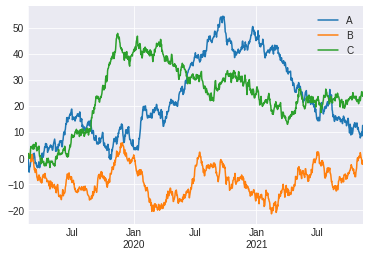

In [131]:
tsdf = pd.DataFrame(np.random.randn(1000,3), 
                    index=pd.date_range(date.today(), periods=1000),
                    columns=['A', 'B', 'C'])
tsdf.cumsum().plot(grid=True);

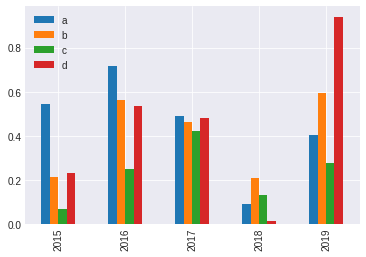

In [132]:
df = pd.DataFrame(rand(5, 4), 
                  columns=['a', 'b', 'c', 'd'], 
                  index=pd.period_range('2015',periods=5,freq='A'))
df.plot(kind='bar')
plt.legend(framealpha=.3);

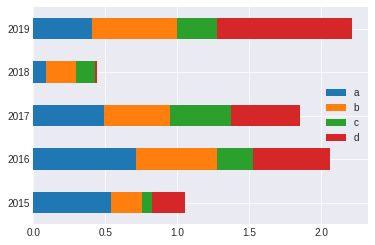

In [133]:
df.plot(kind='barh', stacked=True);

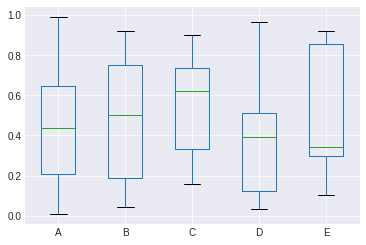

In [134]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot(kind='box', grid=True);

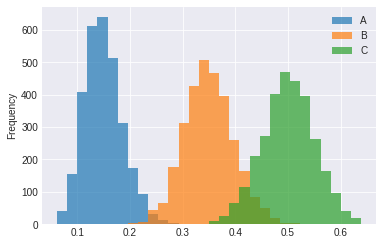

In [135]:
df = pd.DataFrame(np.random.dirichlet((15,35,50), 3000), columns=['A','B','C'])
_ = df.plot(kind='hist',bins=30,alpha=.7) 
#30 bins to split the data, alpha controls transparency

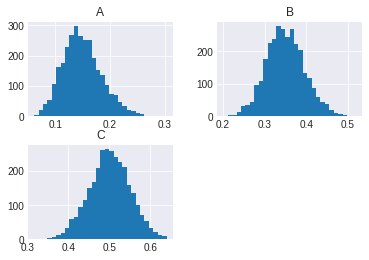

In [136]:
df.hist(bins=30);

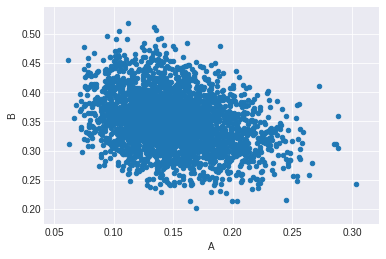

In [137]:
df.plot(kind='scatter',x='A',y='B');

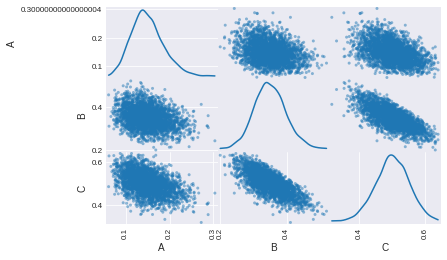

In [138]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,alpha=0.5,diagonal='kde');

### Reading and Saving

### THE END